In [1]:
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

import topocalib
from topocalib.layout import generate_layout, show_layout
from topocalib.model_cv import generate_projections
from topocalib.optimizer import optimize, optimize_pix4d
from topocalib.model_pix4d import get_pixel_coordinates as get_pixel_coordinates_pix4d
from topocalib.visualise import show_correlation_matrix, show_residuals, show_residuals2, show_residuals_all

Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found


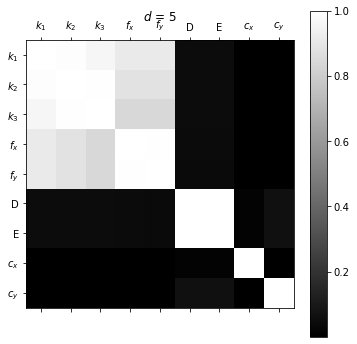

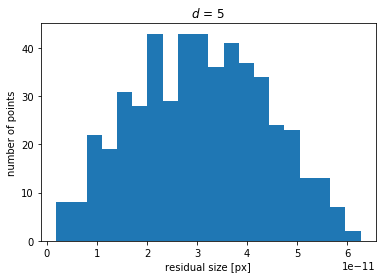

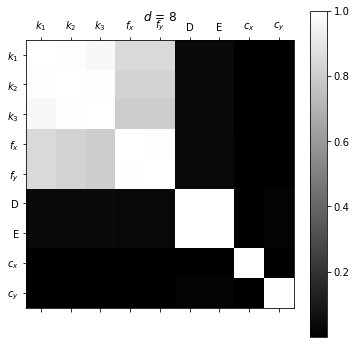

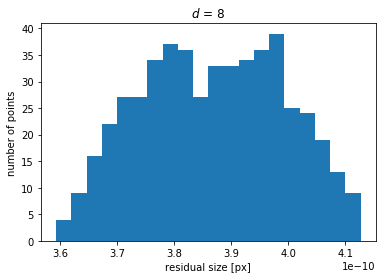

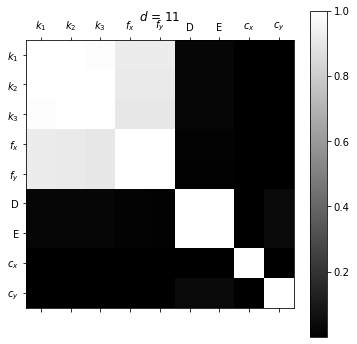

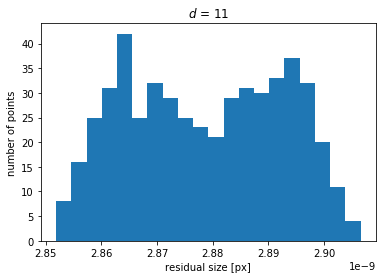

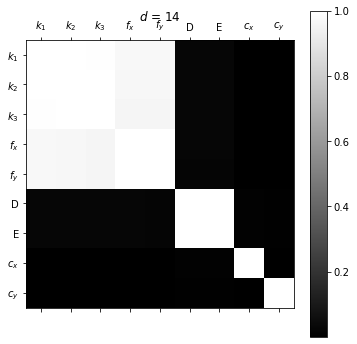

In [3]:
%autoreload

corr_names=['$ k_1 $', '$ k_2 $', '$ k_3 $', '$ f_x $', '$ f_y $', 'D', 'E', '$ c_x $', '$ c_y $']
obs_id = 2
#ax, figure = plt.subplots(5, 3, figsize=(20, 5))

for i, val in enumerate(range(2, 15, 3)):
    Ts, Rs, X_ws = generate_layout(slope=np.pi/6, step=0.9, nplains=2, distance=val, plainsize=(6, 6), planetransl=[-1, -4, 0])
    X_cs = generate_projections(X_ws, Ts, Rs)

    # show_layout(Ts, Rs, X_ws)
    
    res = optimize_pix4d(X_ws, X_cs, maxiter=60)
    corr, ax_corr = show_correlation_matrix(res.jacobian, names=corr_names)
    ax_hist = show_residuals_all(X_cs, X_ws, 
                   Ts, 
                   Rs, 
                   get_pixel_coordinates_pix4d, 
                   ks=res.D, 
                   C=res.K[0,0], 
                   F=res.K[1,1], 
                   D=res.K[0,1], 
                   E=res.K[1,0], 
                   center=res.K[0:2,2].flat)
    
    title = f'$d$ = {val}'
    ax_corr.set_title(title)
    ax_hist.set_title(title)

Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found


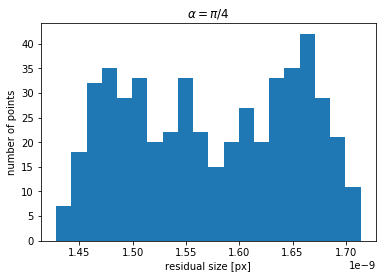

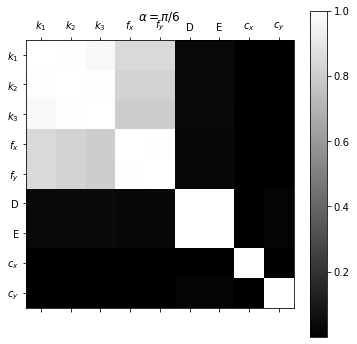

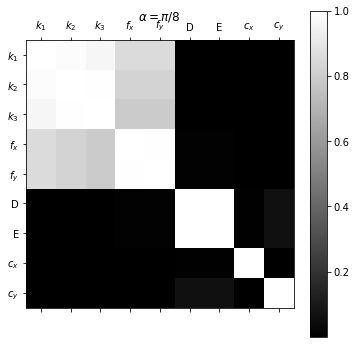

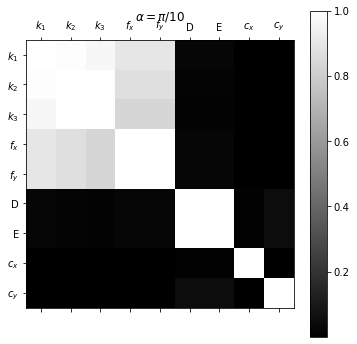

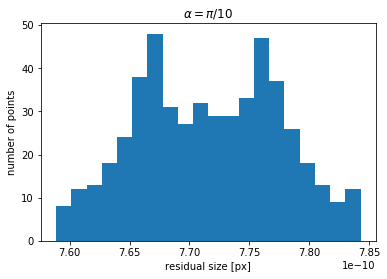

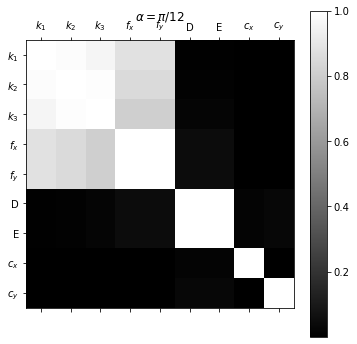

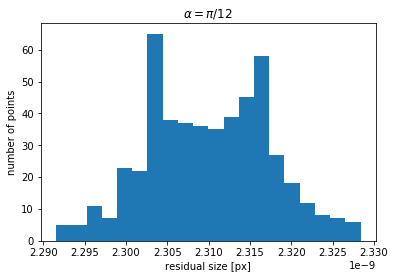

In [4]:
for i, val in enumerate(range(4, 14, 2)):
    Ts, Rs, X_ws = generate_layout(slope=np.pi/val, step=0.9, nplains=2, distance=8, plainsize=(6, 6), planetransl=[-1, -4, 0])
    X_cs = generate_projections(X_ws, Ts, Rs)

    # show_layout(Ts, Rs, X_ws)
    
    res = optimize_pix4d(X_ws, X_cs, maxiter=60)
    corr, ax_corr = show_correlation_matrix(res.jacobian, names=corr_names)
    ax_hist = show_residuals_all(X_cs, X_ws, 
                   Ts, 
                   Rs, 
                   get_pixel_coordinates_pix4d, 
                   ks=res.D, 
                   C=res.K[0,0], 
                   F=res.K[1,1], 
                   D=res.K[0,1], 
                   E=res.K[1,0], 
                   center=res.K[0:2,2].flat)
    
    title = f'$ \u03B1 = \pi / {val}$'
    ax_corr.set_title(title)
    ax_hist.set_title(title)

Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found


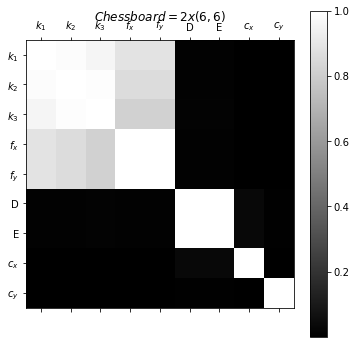

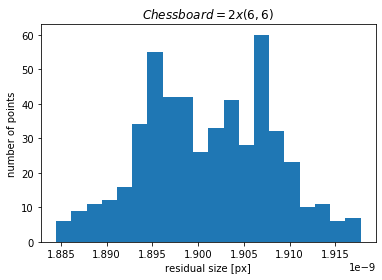

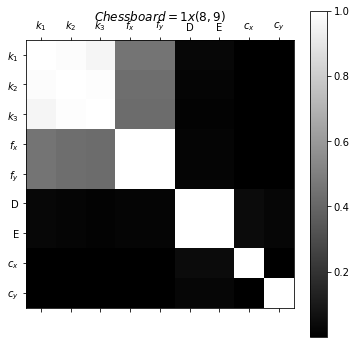

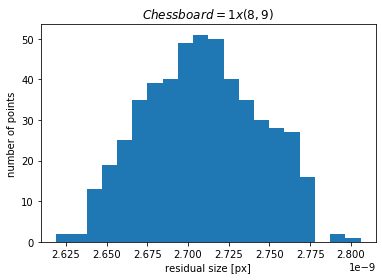

In [5]:
nplains_poss = [2, 1]
plainsize_poss = [(6, 6), (8, 9)]

for i, val in enumerate(range(2)):
    Ts, Rs, X_ws = generate_layout(slope=np.pi/11, step=0.9, nplains=nplains_poss[i], distance=8, plainsize=plainsize_poss[i], planetransl=[-1, -4, 0])
    X_cs = generate_projections(X_ws, Ts, Rs)

    # show_layout(Ts, Rs, X_ws)
    
    res = optimize_pix4d(X_ws, X_cs, maxiter=60)
    corr, ax_corr = show_correlation_matrix(res.jacobian, names=corr_names)
    ax_hist = show_residuals_all(X_cs, X_ws, 
                   Ts, 
                   Rs, 
                   get_pixel_coordinates_pix4d, 
                   ks=res.D, 
                   C=res.K[0,0], 
                   F=res.K[1,1], 
                   D=res.K[0,1], 
                   E=res.K[1,0], 
                   center=res.K[0:2,2].flat)
    
    title = f'$ Chessboard = {nplains_poss[i]} x {plainsize_poss[i]} $'
    ax_corr.set_title(title)
    ax_hist.set_title(title)

Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found


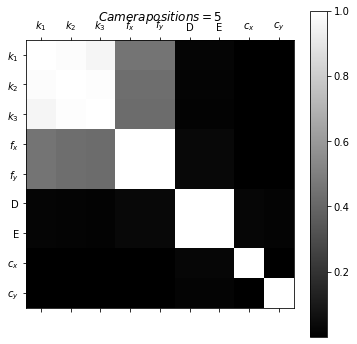

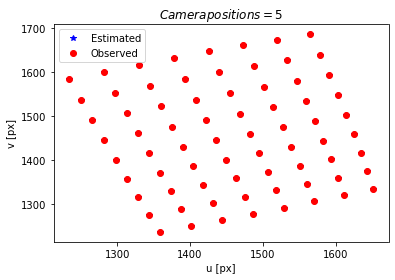

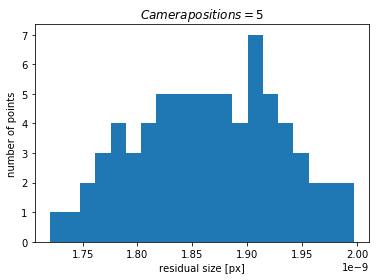

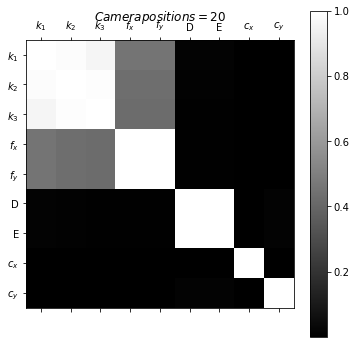

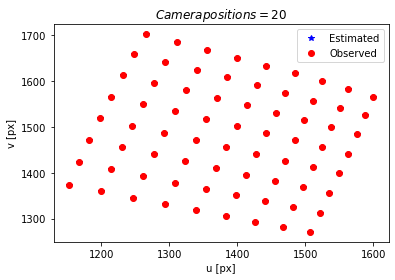

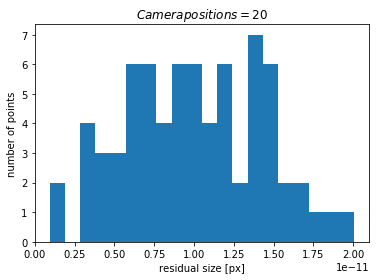

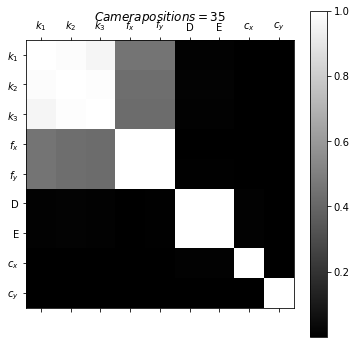

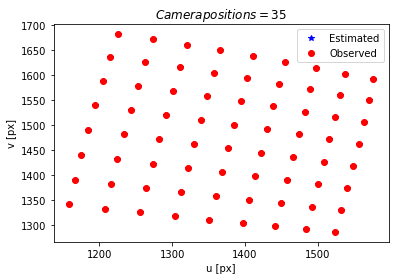

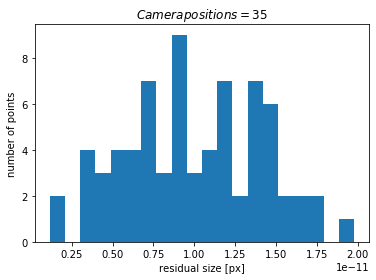

In [27]:
nplains_poss = [2, 1]
plainsize_poss = [(6, 6), (8, 9)]

for i, val in enumerate(range(5, 50, 15)):
    Ts, Rs, X_ws = generate_layout(slope=np.pi/11, step=np.pi / val, nplains=1, distance=8, plainsize=(8, 9), planetransl=[-1, -4, 0])
    X_cs = generate_projections(X_ws, Ts, Rs)

    # show_layout(Ts, Rs, X_ws)
    
    res = optimize_pix4d(X_ws, X_cs, maxiter=60)
    corr, ax_corr = show_correlation_matrix(res.jacobian, names=corr_names)
    ax_res, ax_hist = show_residuals2(X_cs[obs_id], X_ws[obs_id], 
                   get_pixel_coordinates_pix4d, 
                   T=Ts[obs_id], 
                   R=Rs[obs_id], 
                   ks=res.D, 
                   C=res.K[0,0], 
                   F=res.K[1,1], 
                   D=res.K[0,1], 
                   E=res.K[1,0], 
                   center=res.K[0:2,2].reshape(2).A1)
    
    title = f'$ Camera positions = {val} $'
    ax_corr.set_title(title)
    ax_res.set_title(title)
    ax_hist.set_title(title)

Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found
Looking for initial guess...
Initial guess found


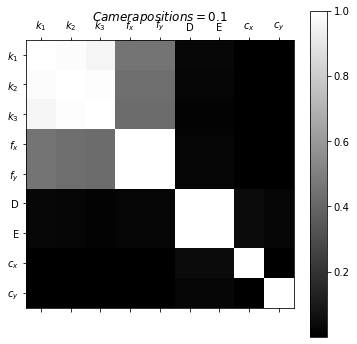

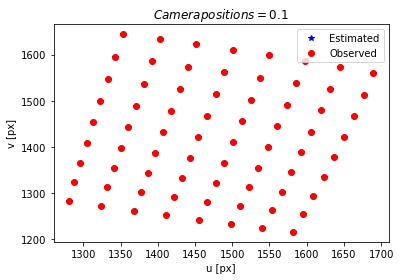

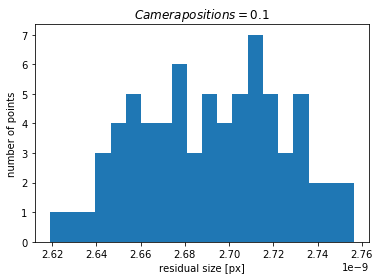

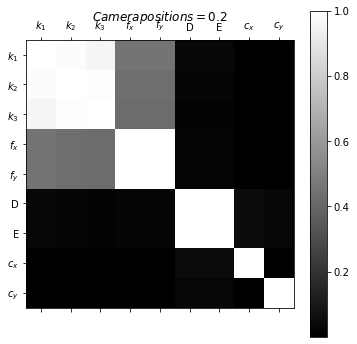

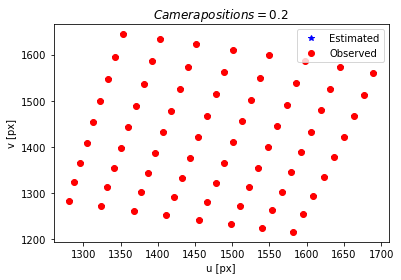

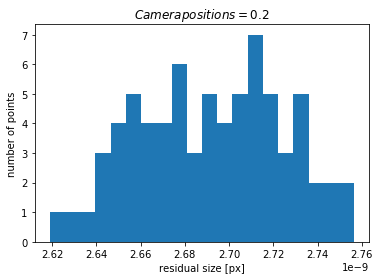

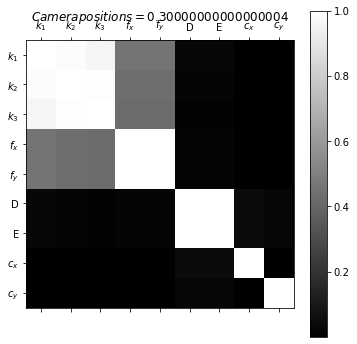

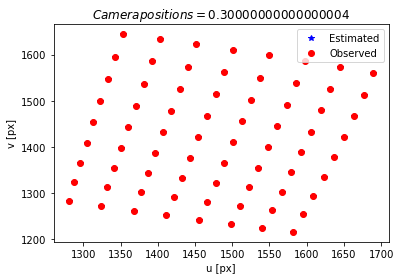

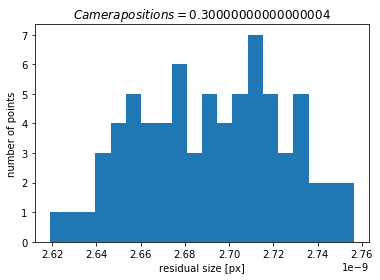

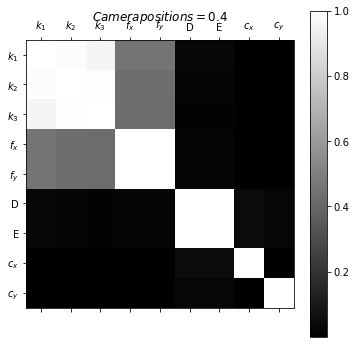

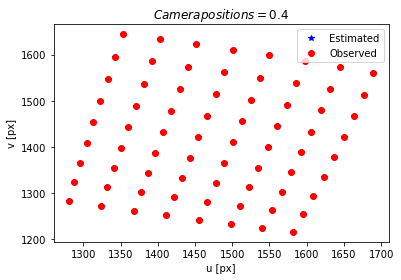

In [ ]:
for i, val in enumerate(np.arange(0.1, 0.5, 0.1)):
    Ts, Rs, X_ws = generate_layout(slope=np.pi/11, step=0.9, nplains=1, distance=8, plainsize=(8, 9), planetransl=[-1, -4, 0])
    for R in Rs:
        R = np.random.normal(0, val, size=R.shape)

    X_cs = generate_projections(X_ws, Ts, Rs)

    # show_layout(Ts, Rs, X_ws)
    
    res = optimize_pix4d(X_ws, X_cs, maxiter=60)
    corr, ax_corr = show_correlation_matrix(res.jacobian, names=corr_names)
    ax_res, ax_hist = show_residuals2(X_cs[obs_id], X_ws[obs_id], 
                   get_pixel_coordinates_pix4d, 
                   T=Ts[obs_id], 
                   R=Rs[obs_id], 
                   ks=res.D, 
                   C=res.K[0,0], 
                   F=res.K[1,1], 
                   D=res.K[0,1], 
                   E=res.K[1,0], 
                   center=res.K[0:2,2].reshape(2).A1)
    
    title = f'$ Camera positions = {val} $'
    ax_corr.set_title(title)
    ax_res.set_title(title)
    ax_hist.set_title(title)